# Capstone Project: Bellabeat

# 1. Introduction
**About the company**

Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products. Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned
itself as a tech-driven wellness company for women. By 2016, Bellabeat had opened offices around the world and launched multiple products. Bellabeat products became available through a growing number of online retailers in addition to their own e-commerce channel on their website. The company has invested in traditional advertising media, such as radio, out-of-home billboards, print, and television, but focuses on digital marketing extensively. Bellabeat invests year-round in Google Search, maintaining active Facebook and Instagram pages, and consistently engages consumers on Twitter. Additionally, Bellabeat runs video ads on Youtube and display ads on the Google Display Network to support campaigns around key marketing dates. Sršen knows that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. She has asked the marketing analytics team to focus on a Bellabeat product and analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, using this information, she would like high-level recommendations for how these trends can inform Bellabeat marketing strategy.

**Scenario**

You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global [smart device](https://en.wikipedia.org/wiki/Smart_device) market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing strategy. 

This project aims to analyze fitness and wellness data from non-Bellabeat smart devices to uncover trends in smart device usage. By identifying patterns in user behavior, the analysis will inform marketing strategies for Bellabeat app product, focusing on enhancing customer engagement and promoting healthy habits.

This project will be completed using the 6 stages of Data Analysis namely:

* **Ask**: In this stage the key business questions will be identified along with the stakeholders
* **Prepare**: Collect the data, identify how it’s organized, determine the credibility of the data.
* **Process**: Select the tool for data cleaning, check for errors and document the cleaning process.
* **Analyze**: Organize and format the data, aggregate the data so that it’s useful, perform calculations and identify trends and relationships.
* **Share**: Use design thinking principles and data-driven storytelling approach, present the findings with effective visualization. Ensure the analysis has answered the business task.
* **Act**: Share the final conclusion and the recommendations.

# STAGE 1: ASK

Problem:
This project aims to analyze fitness and wellness data from non-Bellabeat smart devices to uncover trends in smart device usage. By identifying patterns in user behavior, the analysis will inform marketing strategies for Bellabeat app product, focusing on enhancing customer engagement and promoting healthy habits.

Stakeholders:
* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
* Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
* Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting
data that helps guide Bellabeat’s marketing strategy. You joined this team six months ago and have been busy
learning about Bellabeat’’s mission and business goals — as well as how you, as a junior data analyst, can help
Bellabeat achieve them.

# STAGE 2: PREPARE

The dataset used in this analysis is the [FitBit Fitness TrackerData](https://www.kaggle.com/datasets/arashnic/fitbit) provided through [Mobius](https://www.kaggle.com/arashnic). This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016.Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits. The dataset provides comprehensive details on daily activity, calorie burn, and sleep patterns, aligning closely with the features of the Leaf wellness tracker. By leveraging this data, we can uncover trends in device usage that can inform Bellabeat's product positioning and marketing strategy.

# STAGE 3: PROCESS

I will be using Kaggle notebook to document, code, clean, and process the data. The language I will be working in is R. To get started I will load some libraries and datasets in my notebook.

In [1]:
# Loading packages
library(tidyverse)
library(lubridate)
library(skimr)
library(janitor)

# Loading datasets
daily_activity <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep_day <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
intensity_data <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [2]:
# Take a look at the three datasets
head(daily_activity)
head(sleep_day)
head(intensity_data)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


In [3]:
# Identify all the columns in the three datasets.
colnames(daily_activity)
colnames(sleep_day)
colnames(intensity_data)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

[1] "Id"               "ActivityHour"     "TotalIntensity"   "AverageIntensity"

In [4]:
# Checking for any null vlaues
sum(is.na(daily_activity))
sum(is.na(sleep_day))
sum(is.na(intensity_data))

[1] 0

[1] 0

[1] 0

In [5]:
# Checking for duplicated data
sum(duplicated(daily_activity))
sum(duplicated(sleep_day))
sum(duplicated(intensity_data))

[1] 0

[1] 3

[1] 0

In [16]:
# Removed duplicated data in sleep_data
sleep_day_clean <- distinct(sleep_day)

In [17]:
# Checking for inappropriate values in daily_activity and exclude them from the data
unrealistic_values <- daily_activity %>%
  filter(TotalSteps<=0 & TotalDistance<= 0 & Calories<=0)
print(unrealistic_values)

          Id ActivityDate TotalSteps TotalDistance TrackerDistance
1 1503960366    5/12/2016          0             0               0
2 6290855005    5/10/2016          0             0               0
3 8253242879    4/30/2016          0             0               0
4 8583815059    5/12/2016          0             0               0
  LoggedActivitiesDistance VeryActiveDistance ModeratelyActiveDistance
1                        0                  0                        0
2                        0                  0                        0
3                        0                  0                        0
4                        0                  0                        0
  LightActiveDistance SedentaryActiveDistance VeryActiveMinutes
1                   0                       0                 0
2                   0                       0                 0
3                   0                       0                 0
4                   0                       0         

In [18]:
daily_activity_clean <- daily_activity %>%
  filter(!(TotalSteps<=0 & TotalDistance<= 0 & Calories<=0))

In [19]:
# Renamed all columns to lowercase for datasets
daily_activity_clean <- daily_activity_clean %>%
  rename_with(tolower)

sleep_day_clean <- sleep_day_clean %>%
  rename_with(tolower)

intensity_data_clean <- intensity_data %>%
  rename_with(tolower)

In [20]:
# Formatted dates appropriately for the datasets to ensure they all have consistent date format

# daily activity
daily_activity_clean$activitydate=as.POSIXct(daily_activity_clean$activitydate, format="%m/%d/%Y", tz=Sys.timezone())

# sleep
sleep_day_clean$sleepday=as.POSIXct(sleep_day_clean$sleepday, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())

# intensity
intensity_data_clean$activityhour=as.POSIXct(intensity_data_clean$activityhour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
intensity_data_clean$time <- format(intensity_data_clean$activityhour, format = "%H:%M:%S")
intensity_data_clean$date <- format(intensity_data_clean$activityhour, format = "%m/%d/%y")

In [21]:
# Cross-checking missing Values
sum(is.na(daily_activity_clean))
sum(is.na(sleep_day_clean))
sum(is.na(intensity_data_clean))

[1] 0

[1] 0

[1] 0

In [22]:
# 'date' columns in  daily_activity_clean and sleep_data_clean are renamed 'date' for merge
sleep_day_clean <- sleep_day_clean %>%
  rename(date = sleepday)

daily_activity_clean <- daily_activity_clean %>%
  rename(date = activitydate)

In [23]:
#Checking the data again to ensure everything is appropriate enough for analyzing
head(daily_activity_clean)
head(sleep_day_clean)
head(intensity_data_clean)


,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,id,date,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<dttm>,<int>,<int>,<int>
1,1503960366,2016-04-12,1,327,346
2,1503960366,2016-04-13,2,384,407
3,1503960366,2016-04-15,1,412,442
4,1503960366,2016-04-16,2,340,367
5,1503960366,2016-04-17,1,700,712
6,1503960366,2016-04-19,1,304,320


,id,activityhour,totalintensity,averageintensity,time,date
,<dbl>,<dttm>,<int>,<dbl>,<chr>,<chr>
1,1503960366,2016-04-12 00:00:00,20,0.333333,00:00:00,04/12/16
2,1503960366,2016-04-12 01:00:00,8,0.133333,01:00:00,04/12/16
3,1503960366,2016-04-12 02:00:00,7,0.116667,02:00:00,04/12/16
4,1503960366,2016-04-12 03:00:00,0,0.000000,03:00:00,04/12/16
5,1503960366,2016-04-12 04:00:00,0,0.000000,04:00:00,04/12/16
6,1503960366,2016-04-12 05:00:00,0,0.000000,05:00:00,04/12/16


## How many unique participants are there in each data frame? 

In [24]:
# Number of distinct participants in each dataset
n_distinct(daily_activity_clean$id)
n_distinct(sleep_day_clean$id)
n_distinct(intensity_data_clean$id)


[1] 33

[1] 24

[1] 33

Here, we can see the number of participants in activity and intensity are 33, which is more than those of the sleep data, 24 participants.

## How many observations are there in each data frame?

In [25]:
#Checked the number of observations in each dataset
nrow(daily_activity_clean)
nrow(sleep_day_clean)
nrow(intensity_data_clean)


[1] 936

[1] 410

[1] 22099

The daily activity data has 936 observations, sleep data has 410 observations and intensity data has 22099 observations.

In [26]:
# Some quick summary statistics of each data frame
# For the daily activity dataframe:
daily_activity_clean %>%  
  select(totalsteps,totaldistance,sedentaryminutes, calories) %>%
  summary()

# For the sleep dataframe:
sleep_day_clean %>%
  select(totalsleeprecords, totalminutesasleep, totaltimeinbed) %>%
  summary()

# For the intensity dataframe
 intensity_data_clean %>%
   select(totalintensity, averageintensity)%>%
   summary()

   totalsteps    totaldistance    sedentaryminutes    calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :  52  
 1st Qu.: 3818   1st Qu.: 2.645   1st Qu.: 729.0   1st Qu.:1834  
 Median : 7441   Median : 5.265   Median :1057.0   Median :2144  
 Mean   : 7671   Mean   : 5.513   Mean   : 989.3   Mean   :2313  
 3rd Qu.:10734   3rd Qu.: 7.720   3rd Qu.:1226.0   3rd Qu.:2794  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

 totalsleeprecords totalminutesasleep totaltimeinbed 
 Min.   :1.00      Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.00      1st Qu.:361.0      1st Qu.:403.8  
 Median :1.00      Median :432.5      Median :463.0  
 Mean   :1.12      Mean   :419.2      Mean   :458.5  
 3rd Qu.:1.00      3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.00      Max.   :796.0      Max.   :961.0  

 totalintensity   averageintensity
 Min.   :  0.00   Min.   :0.0000  
 1st Qu.:  0.00   1st Qu.:0.0000  
 Median :  3.00   Median :0.0500  
 Mean   : 12.04   Mean   :0.2006  
 3rd Qu.: 16.00   3rd Qu.:0.2667  
 Max.   :180.00   Max.   :3.0000  

## What does this tell us about how this sample of people's activities? 
Observation on the 3 datasets reveals that the average total steps is 7671, resulting in average burnt calories at 2313. However, according to [an article of the Medical News Today](https://www.medicalnewstoday.com/articles/325809#fa-qs), a person should aim to walk around 10,000 steps per day to effectively burn calories and maintain a healthy weight. Therefore, we can have an indication that people do not usually walk, which can lead to the direction of adding new features of smart device products.

The average total minute asleep is 419.2, approximately 7 hours, is close enough to the recommended time in bed for adults according to scientists in [a joint consensus statement of the American Academy of Sleep Medicine and Sleep Research Society](https://pmc.ncbi.nlm.nih.gov/articles/PMC4434546/#:~:text=Adults%20should%20sleep%207%20or,and%20increased%20risk%20of%20death.)


In [27]:
# Merging the cleaned sleep_data and daily_activity by "id" and "date" to explore correlation for further decisions
merged_data <- merge(sleep_day_clean, daily_activity_clean, by = c("id", "date"))
head(merged_data)

,id,date,totalsleeprecords,totalminutesasleep,totaltimeinbed,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
,<dbl>,<dttm>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,1,327,346,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,2,384,407,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-15,1,412,442,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
4,1503960366,2016-04-16,2,340,367,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
5,1503960366,2016-04-17,1,700,712,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
6,1503960366,2016-04-19,1,304,320,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035


In [28]:
# Check again for the number of distinct participants in merged data
n_distinct(merged_data$id)

[1] 24

There are 24 distinct participants in the merged data as the 24 participants of the sleep data was merged with the daily activity based on the id.

In [29]:
# Converted relevant columns from double to integer
merged_data$totalsleeprecords <- as.integer(merged_data$totalsleeprecords)
merged_data$totalsteps <- as.integer(merged_data$totalsteps)
merged_data$totalminutesasleep <- as.integer(merged_data$totalminutesasleep)
merged_data$totaltimeinbed <- as.integer(merged_data$totaltimeinbed)
merged_data$veryactiveminutes <- as.integer(merged_data$veryactiveminutes)
merged_data$fairlyactiveminutes <- as.integer(merged_data$fairlyactiveminutes)
merged_data$lightlyactiveminutes <- as.integer(merged_data$lightlyactiveminutes)
merged_data$sedentaryminutes <- as.integer(merged_data$sedentaryminutes)
merged_data$calories <- as.integer(merged_data$calories)


# STAGE 4: ANALYZE

After some quick summary of the data, we will move on to the analysis phase for further insights.

In [30]:
# A quick look at the activity trends
activity_summary <- daily_activity_clean %>%
  group_by(date) %>%
  summarise(
    avg_steps = mean(totalsteps, na.rm = TRUE),
    avg_calories = mean(calories, na.rm = TRUE),
    avg_active_minutes = mean(veryactiveminutes + fairlyactiveminutes + lightlyactiveminutes, na.rm = TRUE)
  )

print(activity_summary)

# A tibble: 31 × 4
   date                avg_steps avg_calories avg_active_minutes
   <dttm>                  <dbl>        <dbl>              <dbl>
 1 2016-04-12 00:00:00     8237.        2391.               229.
 2 2016-04-13 00:00:00     7199.        2287.               213.
 3 2016-04-14 00:00:00     7744.        2356.               234.
 4 2016-04-15 00:00:00     7534.        2355.               243.
 5 2016-04-16 00:00:00     8679.        2393.               237.
 6 2016-04-17 00:00:00     6409.        2231.               196.
 7 2016-04-18 00:00:00     7897.        2333.               229.
 8 2016-04-19 00:00:00     8049.        2359.               240.
 9 2016-04-20 00:00:00     8163.        2395.               247.
10 2016-04-21 00:00:00     8244.        2422.               224.
# ℹ 21 more rows


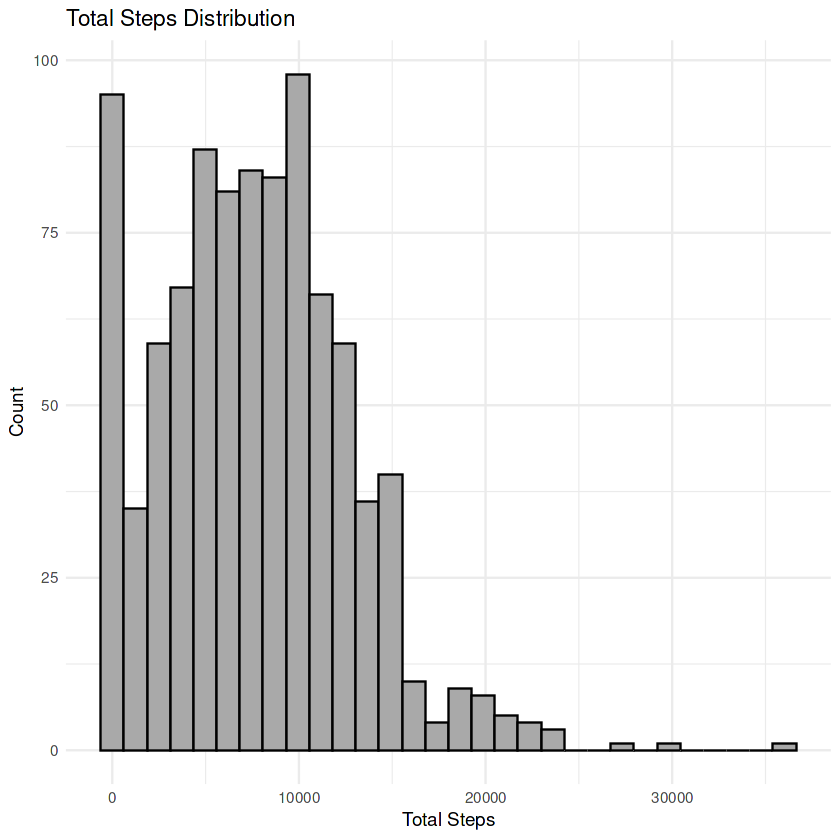

In [36]:
# Step distribution
ggplot(daily_activity_clean, aes(x = totalsteps)) +
  geom_histogram(fill = "darkgray", color = "black", bins = 30) +
  labs(title = "Total Steps Distribution", x = "Total Steps", y = "Count") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


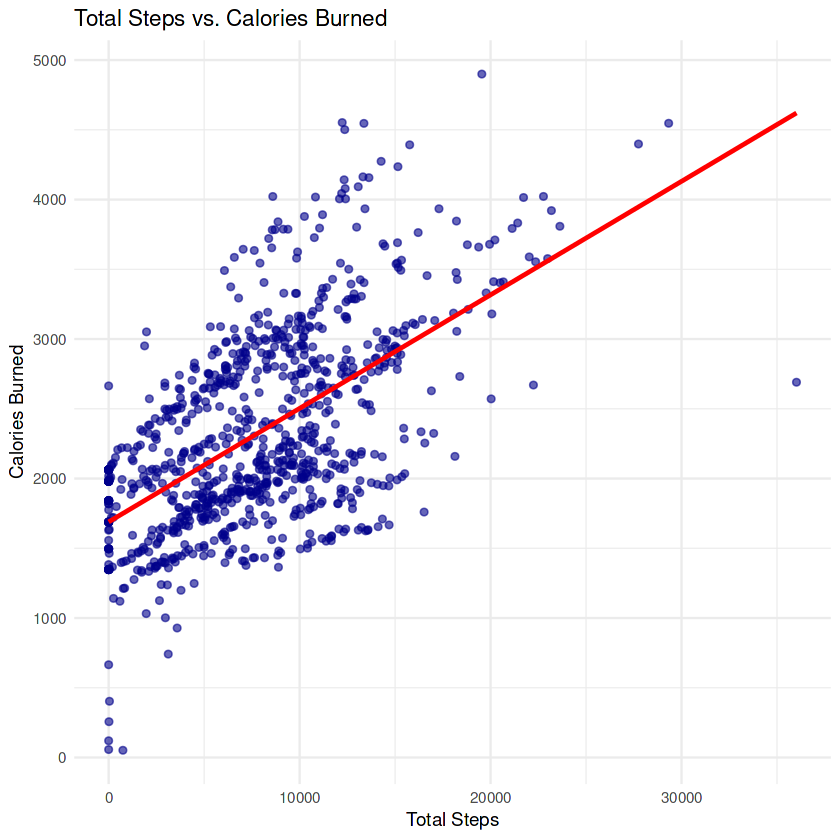

In [43]:
# Total Steps vs. Calories burnt
ggplot(daily_activity_clean, aes(x = totalsteps, y = calories)) +
  geom_jitter(alpha = 0.6, color = "darkblue") +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  labs(title = "Total Steps vs. Calories Burnt" , x = "Total Steps", y = "Calories Burnt") +
  theme_minimal()

**Observations:**

* The scatter plot suggests a positive linear correlation.

* The density of dots between 6,000 and 10,000 steps is higher than other values, showing that this might be the common daily goal.

* The higher total steps, the more calories are burnt.

In [41]:
# Assess activity intensity over hourly time
# Summarize by mean of total intensity, group by time
int_summary <- intensity_data_clean %>%
  group_by(time) %>%
  summarise(mean_total_int = mean(totalintensity))

`geom_smooth()` using formula = 'y ~ x'


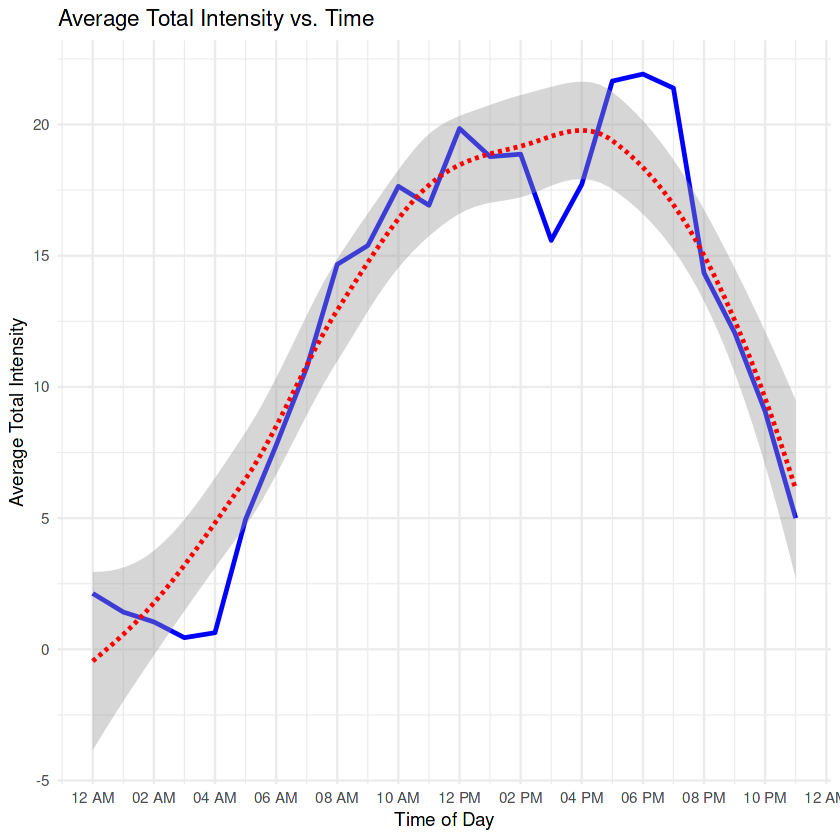

In [52]:
# Visualize Average intensity vs. Time

# Convert time back to POSIXct for proper ordering in the chart
int_summary$time <- as.POSIXct(int_summary$time, format = "%H:%M")

# Plot line chart
ggplot(int_summary, aes(x = time, y = mean_total_int)) +
  geom_line(color = "blue", linewidth = 1) +
  geom_smooth(method = "loess", color = "red", linetype = "dashed") + 
  labs(
    title = "Average Total Intensity vs. Time",
    x = "Time of Day",
    y = "Average Total Intensity"
  ) +
  scale_x_datetime(
    date_labels = "%I %p",  # Format x-axis as "6 AM," "12 PM"
    date_breaks = "2 hours"  # Break axis labels every 2 hours
  ) +
  theme_minimal() # provides a minimalist theme for your ggplot visualizations, resulting in clean, uncluttered plots 
# that are often preferred for publications, presentations, or when you want the data to be the primary focus.

**Observations:**

* Peak activity occurs between 5:00-7:00 PM, reaching intensity levels over 20

* Gradual increase starting around 4:00 AM

* Steady decline in intensity after 7:00 PM

**Notes:** The pattern suggests typical daily routines with morning activity, lunch hour movement, and highest activity during evening hours.

`geom_smooth()` using formula = 'y ~ x'


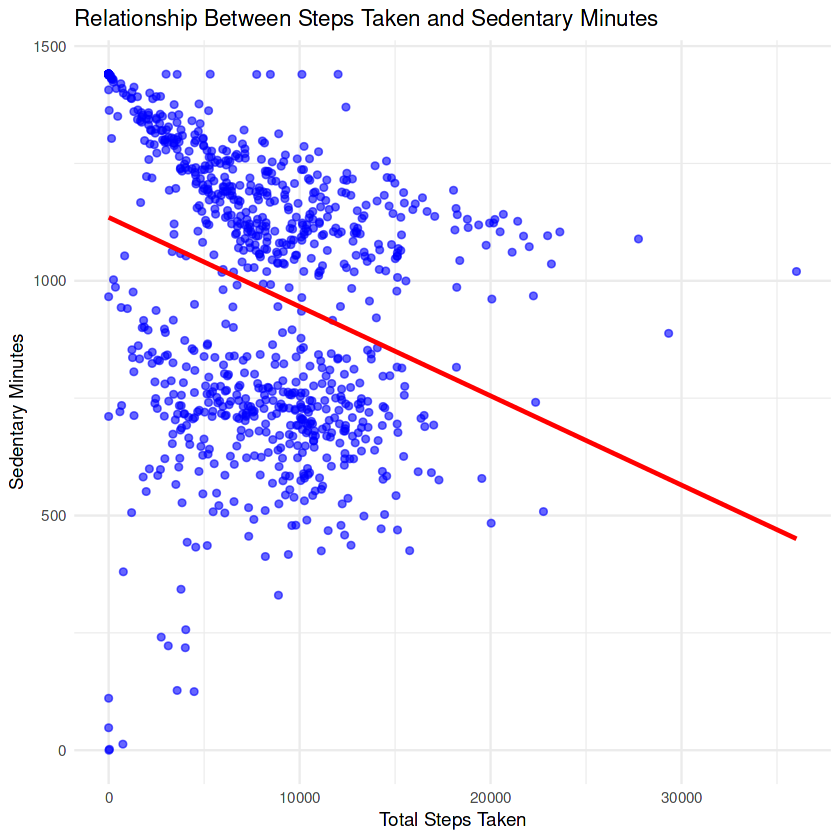

In [44]:
# Scatter Plot: Steps Taken vs. Sedentary Minutes
ggplot(daily_activity_clean, aes(x = totalsteps, y = sedentaryminutes)) +
  geom_jitter(alpha = 0.6, color = "blue") +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  labs(
    title = "Relationship Between Steps Taken and Sedentary Minutes",
    x = "Total Steps Taken",
    y = "Sedentary Minutes"
  ) +
  theme_minimal()

**Observations:**

* Between steps taken and sedentary minutes suggests a clear negative correlation. The value of sedentary minutes plummets as the total step gets higher.

* Some outliers with very low sedentary minutes (\<200) and very high steps (\>25,000)

**Notes:** The relationship appears meaningful but moderate, with considerable individual variation.

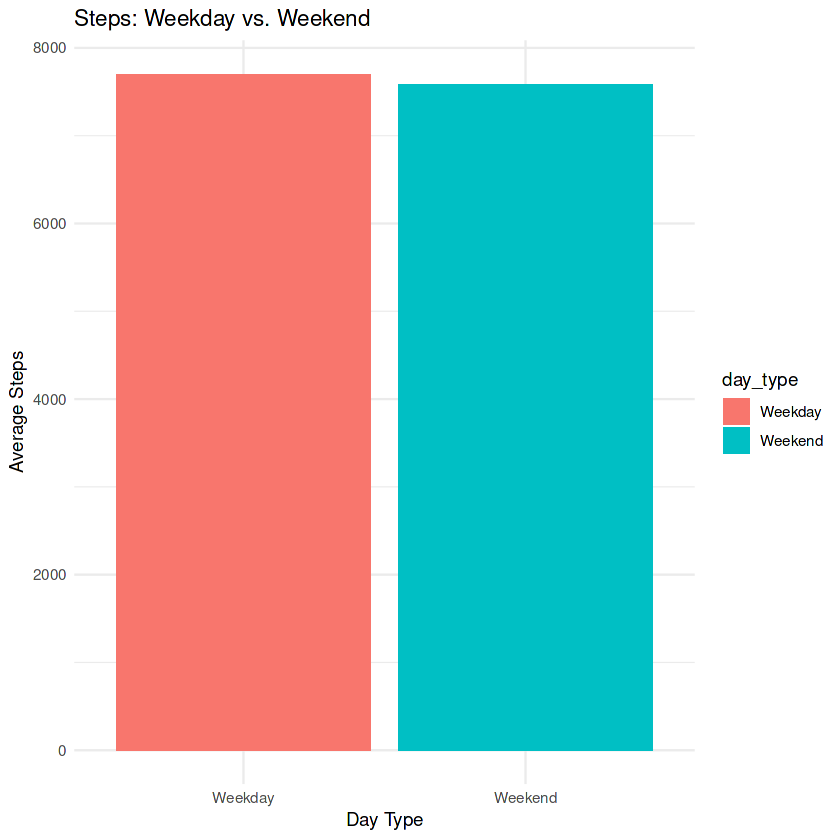

In [54]:
# Weekday vs. Weekend Analysis
daily_activity_clean <- daily_activity_clean %>%
  mutate(day_type = ifelse(weekdays(date) %in% c("Saturday", "Sunday"), "Weekend", "Weekday"))

activity_weekday <- daily_activity_clean %>%
  group_by(day_type) %>%
  summarise(
    avg_steps = mean(totalsteps),
    avg_calories = mean(calories)
  )

# Plot comparison
ggplot(activity_weekday, aes(x = day_type, y = avg_steps, fill = day_type)) +
  geom_bar(stat = "identity") +
  labs(title = "Steps: Weekday vs. Weekend", x = "Day Type", y = "Average Steps") +
  theme_minimal()

**Observation:** 

Weekday vs. weekend step counts are nearly identical, indicating consistent activity levels throughout the week. This suggests good maintenance of activity habits regardless of the day type.

`geom_smooth()` using formula = 'y ~ x'


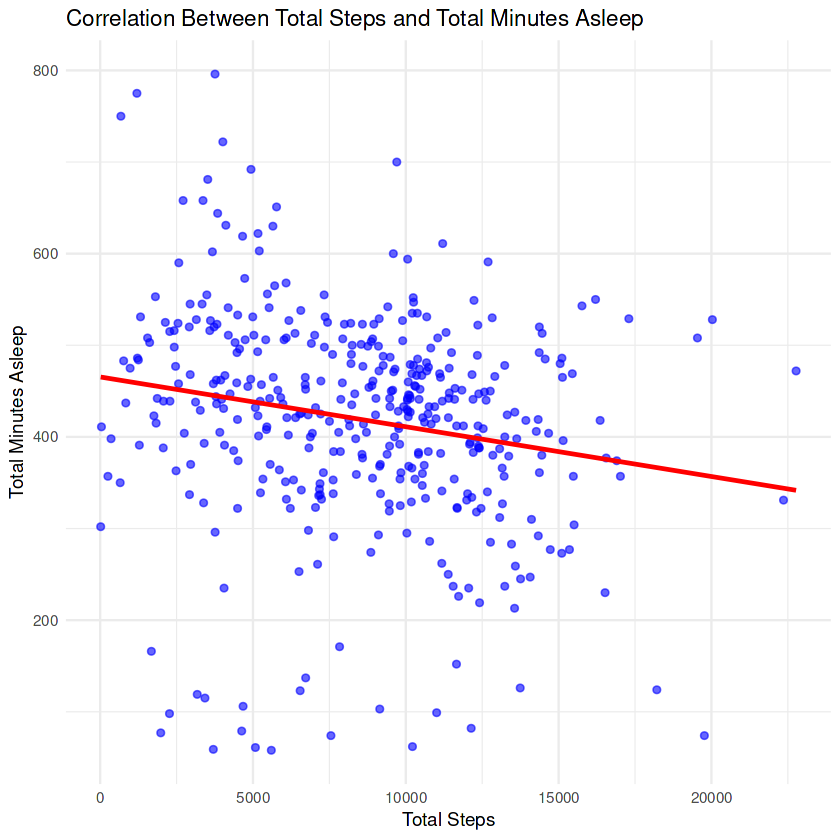

In [46]:
# Scatter plot: Total Steps vs. Total Minutes Asleep
ggplot(merged_data, aes(x = totalsteps, y = totalminutesasleep)) +
  geom_point(alpha = 0.6, color = "blue") +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  labs(
    title = "Correlation Between Total Steps and Total Minutes Asleep",
    x = "Total Steps",
    y = "Total Minutes Asleep"
  ) +
  theme_minimal()

**Observation:** 

A slight negative correlation can be seen in the daily steps and sleep duration graph. As steps increase, the total minutes of sleep drop slightly, though the relationship is weak given the scattered data points.

`geom_smooth()` using formula = 'y ~ x'


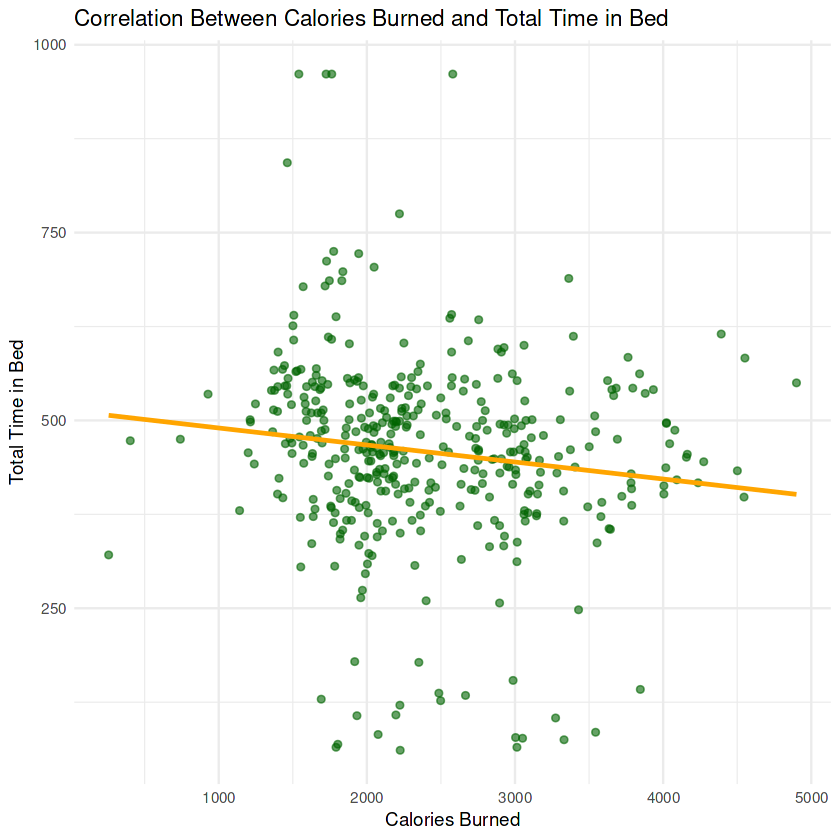

In [55]:
# Scatter plot: Calories vs. Total Time in Bed
ggplot(merged_data, aes(x = calories, y = totaltimeinbed)) +
  geom_point(alpha = 0.6, color = "darkgreen") +
  geom_smooth(method = "lm", color = "orange", se = FALSE) +
  labs(
    title = "Correlation Between Calories Burnt and Total Time in Bed",
    x = "Calories Burnt",
    y = "Total Time in Bed"
  ) +
  theme_minimal()

**Observation:** 

Similarly, calories burnt shows a weak negative correlation with time in bed. Higher calorie burn is associated with less time in bed.

**Notes:** Both "Total Steps vs. Total Minutes Asleep"and "Calories vs. Total Time in Bed" graphs show considerable scatter in the data points around the trend lines, suggesting these relationships aren't very strong and other factors likely influence sleep patterns.

In [50]:
# Calculate Sleep Recommendation
sleep_achieved <- sleep_day_clean %>%
  mutate(sleep_achieved = ifelse(totalminutesasleep >= 420, 1, 0)) %>%
  summarise(percent_achieved_sleep = mean(sleep_achieved) * 100)

# Calculate Activity Recommendation
activity_achieved <- daily_activity_clean %>%
  mutate(active_minutes = veryactiveminutes + fairlyactiveminutes) %>%
  summarise(percent_achieved_activity = mean(active_minutes >= 150) * 100)

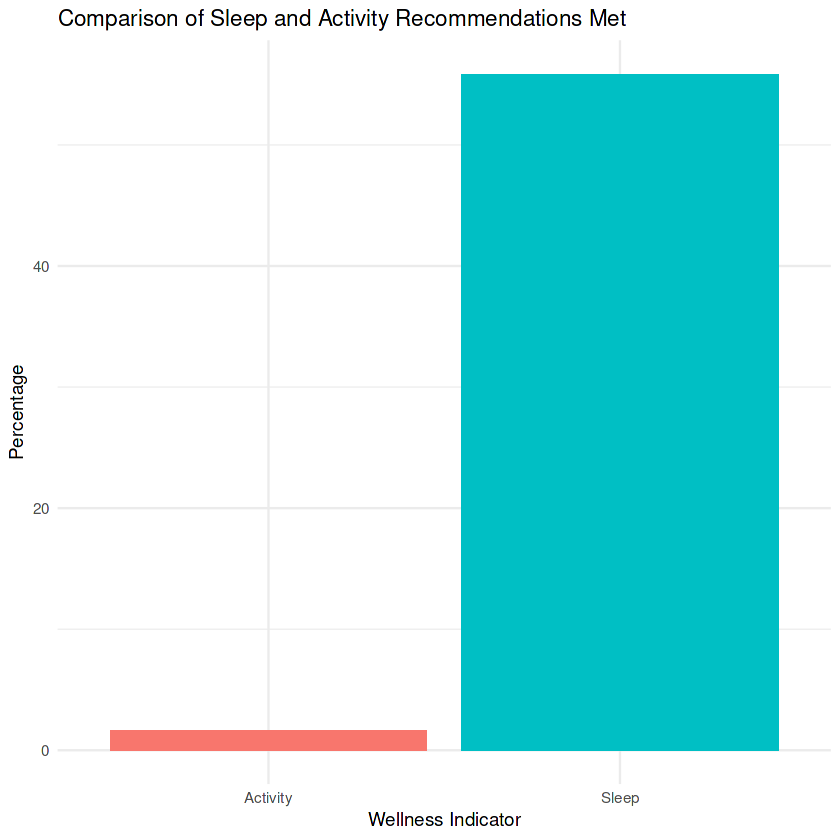

In [51]:
# Combined Sleep and Activity 

combined_data <- tibble(
  Category = c("Sleep", "Activity"),
  Percent = c(
    sleep_achieved$percent_achieved_sleep,
    activity_achieved$percent_achieved_activity
  )
)

# Combined chart
ggplot(combined_data, aes(x = Category, y = Percent, fill = Category)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  labs(title = "Comparison of Sleep and Activity Recommendations Met",
       x = "Wellness Indicator",
       y = "Percentage") +
  theme_minimal()

**Observations:**

* About 55% of users meet the WHO-recommended 7+ hours of sleep per night.

* A majority of users struggle to meet the WHO-recommended 150 minutes of weekly moderate activity.

**Notes:** This sharp contrast indicates that users prioritize sleep habits over physical activity, likely due to differing levels of effort required or lack of awareness about the importance of activity.

# STAGE 5: SHARE

## 5.1 Trends in Smart Device Usage

**Activity Patterns:**

-   Peak physical activity occurs 5:00-7:00 PM, with steady decline after 7:00 PM.

-   Users maintain consistent activity levels between weekdays and weekends.

-   Majority of steps fall between 6,000-10,000 daily, indicating common fitness goals.

-   Strong positive correlation between steps taken and calories burnt.

-   Many users fall short of WHO-recommended 150 minutes weekly moderate activity.

**Sedentary Behavior:**

-   Clear negative correlation between steps taken and sedentary minutes.

-   High scatter around the trend line, suggesting other factors influence sedentary time.

-   Some outliers with very low sedentary minutes (\<200) and very high steps (\>25,000).

**Sleep Habits:**

-   Slight negative correlation between physical activity and sleep duration.

-   Higher calorie burn associated with marginally reduced time in bed.

-   About 55% of users meet the WHO-recommended 7+ hours of sleep per night.

-   Sleep patterns show high variability, suggesting influence of multiple factors.

## 5.2 Relevance to Bellabeat Customers

The findings highlight key opportunities to engage and support Bellabeat users in achieving their health and wellness goals:

-   Encouraging users to incorporate activity breaks to reduce sedentary time, particularly for those with desk jobs.

-   Promoting achievable daily step goals (e.g., 6,000–10,000 steps) to align with user behavior and fitness trends.

-   Offering guidance on balancing physical activity with adequate sleep to optimize overall well-being.

-   Educating users on lifestyle factors that influence sedentary behavior and sleep patterns.

## 5.3 Marketing Strategy Recommendations

-   **Personalized Notifications:** Integrate app reminders encouraging users to reach the 6,000–10,000 step range. These notifications could suggest short walks or engaging workouts to hit the goal.

-   **Sedentary Time Interventions:** Add features to the app to track sedentary minutes and suggest breaks for movement. Include motivational alerts to reduce prolonged inactivity.

-   **"Recovery Insights" Feature:** Develop an app module that tracks the balance between activity and sleep. Notify users when high activity levels negatively impact sleep quality, and recommend relaxation exercises or optimized bedtime routines.

-   **Gamification:** Implement rewards, badges, or streaks for meeting recommended each activity level (e.g., 150 minutes weekly) or maintaining consistent sleep patterns (e.g., 7+ hours per night).

-   **Educational Campaigns:** Launch an educational series on topics such as balancing movement and rest, reducing sedentary time, and optimizing sleep. This could include blog posts, videos, and in-app tips tailored to user behavior.

-    **Environmental Activities:** Carry out annual community campaigns to promote sportsmanship  and encourage users to join hands and create great impacts on the environment.

These strategies can enhance user engagement, align with Bellabeat’s mission to support wellness, and position the app as an essential tool for achieving a balanced and healthy lifestyle.

# STAGE 6: ACT

## 6.1 Conclusion

The analysis reveals key trends in smart device usage that can guide Bellabeat’s product development and suggest marketing strategies. By leveraging insights on activity patterns, sedentary behaviors, and sleep habits,
Bellabeat can create personalized, engaging features to enhance customer experience and promote healthier lifestyles.

While 55% of users meet sleep goals, only 2% achieve the recommended level of physical activity. These insights present a dual opportunity for Bellabeat to reinforce positive sleep habits and address the substantial need for support in promoting physical activity.

## 6.2 Recommendation
By creating personalized, engaging features such as weekly challenges, smart notifications, and educational content, Bellabeat can improve the customer experience and empower users to achieve balanced wellness.
These strategies align with Bellabeat’s mission of promoting healthier lifestyles through data-driven solutions.